In [1]:
import numpy as np # for numeric calculation
import pandas as pd # for data analysis and manupulation
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
from dateutil import parser # convert time in date time data type

In [2]:
from google.colab import files
uploaded = files.upload()

Saving FineTech_appData.csv to FineTech_appData.csv


In [3]:
df= pd.read_csv("FineTech_appData.csv")


In [4]:
df.head(5)

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


The 6th number column’s (screen_list) full information not visible, so for that we used below python code snippet. We print only 5 rows from index 1 to 5 from the screen_list.


In [6]:
for i in [1,2,3,4,5]:
    print(df.loc[i,'screen_list'],'\n')

joinscreen,product_review,product_review2,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,Institutions,Loan2 

Splash,Cycle,Loan 

product_review,Home,product_review,Loan3,Finances,Credit3,ReferralContainer,Leaderboard,Rewards,RewardDetail,ScanPreview,location,VerifyDateOfBirth,VerifyPhone,VerifySSN,Credit1,Credit2 

idscreen,joinscreen,Cycle,Credit3Container,ScanPreview,VerifyPhone,VerifySSN,Credit1,Loan2,Home,Institutions,SelectInstitution,BankVerification,ReferralContainer,product_review,product_review2,VerifyCountry,VerifyToken,product_review 

idscreen,Cycle,Home,ScanPreview,VerifyPhone,VerifySSN,Credit1,Credit3Dashboard,Loan2,Institutions,product_review,product_review,product_review3 



**Dataset info**

1. user: Unique ID for each user.

2. first_open: Date (yy-mm-dd) and time (Hour:Minute:Seconds:Milliseconds) of login on app first time.

3. dayofweek: On which day user logon.

0: Sunday
1: Monday
2: Tuesday
3: Wednesday
4: Thursday
5: Friday
6: Saturday
4. Hour: Time of a day in 24-hour format customer logon. It is correlated with dayofweek column.

5. age: The age of the registered user.

6. screen_list: The name of multiple screens seen by customers, which are separated by a comma.

7. numscreens: The total number of screens seen by customers.

8. minigame: Tha app contains small games related to finance. If the customer played mini-game then 1 otherwise 0.

9. used_premium_feature: If the customer used the premium feature of the app then 1 otherwise 0.

10. enrolled: If the user bought a premium feature app then 1 otherwise 0.

11. enrolled_date: On the date (yy-mm-dd) and time (Hour:Minute:Seconds:Milliseconds) the user bought a premium features app.

12. liked: The each screen of the app has a like button if the customer likes it then 1 otherwise 0.




In [8]:
df.isnull().sum()

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


We can see in the output provided by DataFrame.info() method, there are 50,000 entries (rows) from 0 to 49999 and a total of 12 columns.

All columns have 50,000 non-null values except enrolled_date. It has 31,074 non-null. There is a total of 8 columns that contain integer 64 bit (int64) values and the remaining 4 are object type.

In [11]:
df.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
# Get the unique value of each columns and it's length
features = df.columns
for i in features:
    print("""Unique value of {}\n{}\nlen is {} \n........................\n
          """.format(i, df[i].unique(), len(df[i].unique())))


Unique value of user
[235136 333588 254414 ... 302367 324905  27047]
len is 49874 
........................

          
Unique value of first_open
['2012-12-27 02:14:51.273' '2012-12-02 01:16:00.905'
 '2013-03-19 19:19:09.157' ... '2013-02-20 22:41:51.165'
 '2013-04-28 12:33:04.288' '2012-12-14 01:22:44.638']
len is 49747 
........................

          
Unique value of dayofweek
[3 6 1 4 2 0 5]
len is 7 
........................

          
Unique value of hour
[' 02:00:00' ' 01:00:00' ' 19:00:00' ' 16:00:00' ' 18:00:00' ' 09:00:00'
 ' 03:00:00' ' 14:00:00' ' 04:00:00' ' 11:00:00' ' 06:00:00' ' 21:00:00'
 ' 05:00:00' ' 17:00:00' ' 20:00:00' ' 00:00:00' ' 22:00:00' ' 10:00:00'
 ' 08:00:00' ' 15:00:00' ' 13:00:00' ' 23:00:00' ' 12:00:00' ' 07:00:00']
len is 24 
........................

          
Unique value of age
[ 23  24  28  31  20  35  26  29  39  32  25  17  21  55  38  27  48  37
  22  36  30  58  40  33  57  19  45  34  46  56  42  43  41  47  18  53
  44  49  60  50  52 

The ‘hour’ column contains object data type, so we converted into integer data type format.




In [13]:
#  hour data convert string to int
df['hour'] = df.hour.str.slice(1,3).astype(int) 
 
# get data type of each columns
df.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int64
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

To visualize the data need numeric values for that we drop some columns that datatype is the object.



In [14]:
# drop object dtype columns
df_drop = df.drop(['user', 'first_open', 'screen_list', 'enrolled_date'], axis = 1)


In [15]:
df_drop.head(5)

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
0,3,2,23,15,0,0,0,0
1,6,1,24,13,0,0,0,0
2,1,19,23,3,0,1,0,1
3,4,16,28,40,0,0,1,0
4,1,18,31,32,0,0,1,1


**Data visualization**


Heatmap uses to find the correlation between each and every features using the correlation matrix.



Text(0.5, 1.0, 'Heatmap using correlation matrix of df_drop')

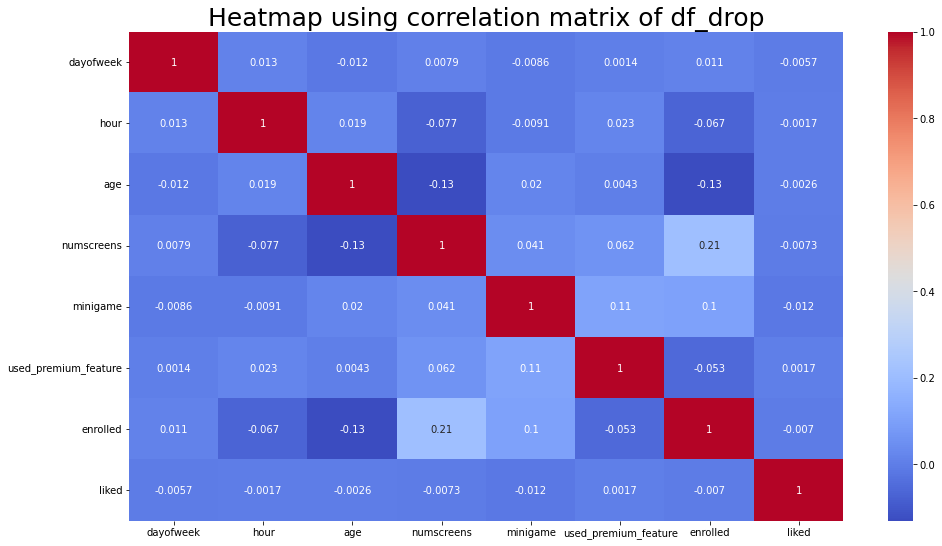

In [16]:
# Heatmap
plt.figure(figsize=(16,9)) # heatmap size in ratio 16:9
 
sns.heatmap(df_drop.corr(), annot = True, cmap ='coolwarm') # show heatmap
 
plt.title("Heatmap using correlation matrix of df_drop", fontsize = 25) # title of heatmap


Max corelation is between enrolled and numscreens which is 0.21 and max negative corelation is b/w numscreens and age. In the fineTech_appData2 dataset, there is no strong correlation between any features. There is little correlation between ‘numscreens’ and ‘enrolled’. It means that those customers saw more screen they are taking premium app. There is a slight correlation between ‘minigame’ with ‘anrolled’ and ‘used_premium_feature’. The slightly negative correlation between ‘age’ with ‘enrolled’ and ‘numscreens’. It means that older customers do not use the premium app and they don’t see multiple screens.

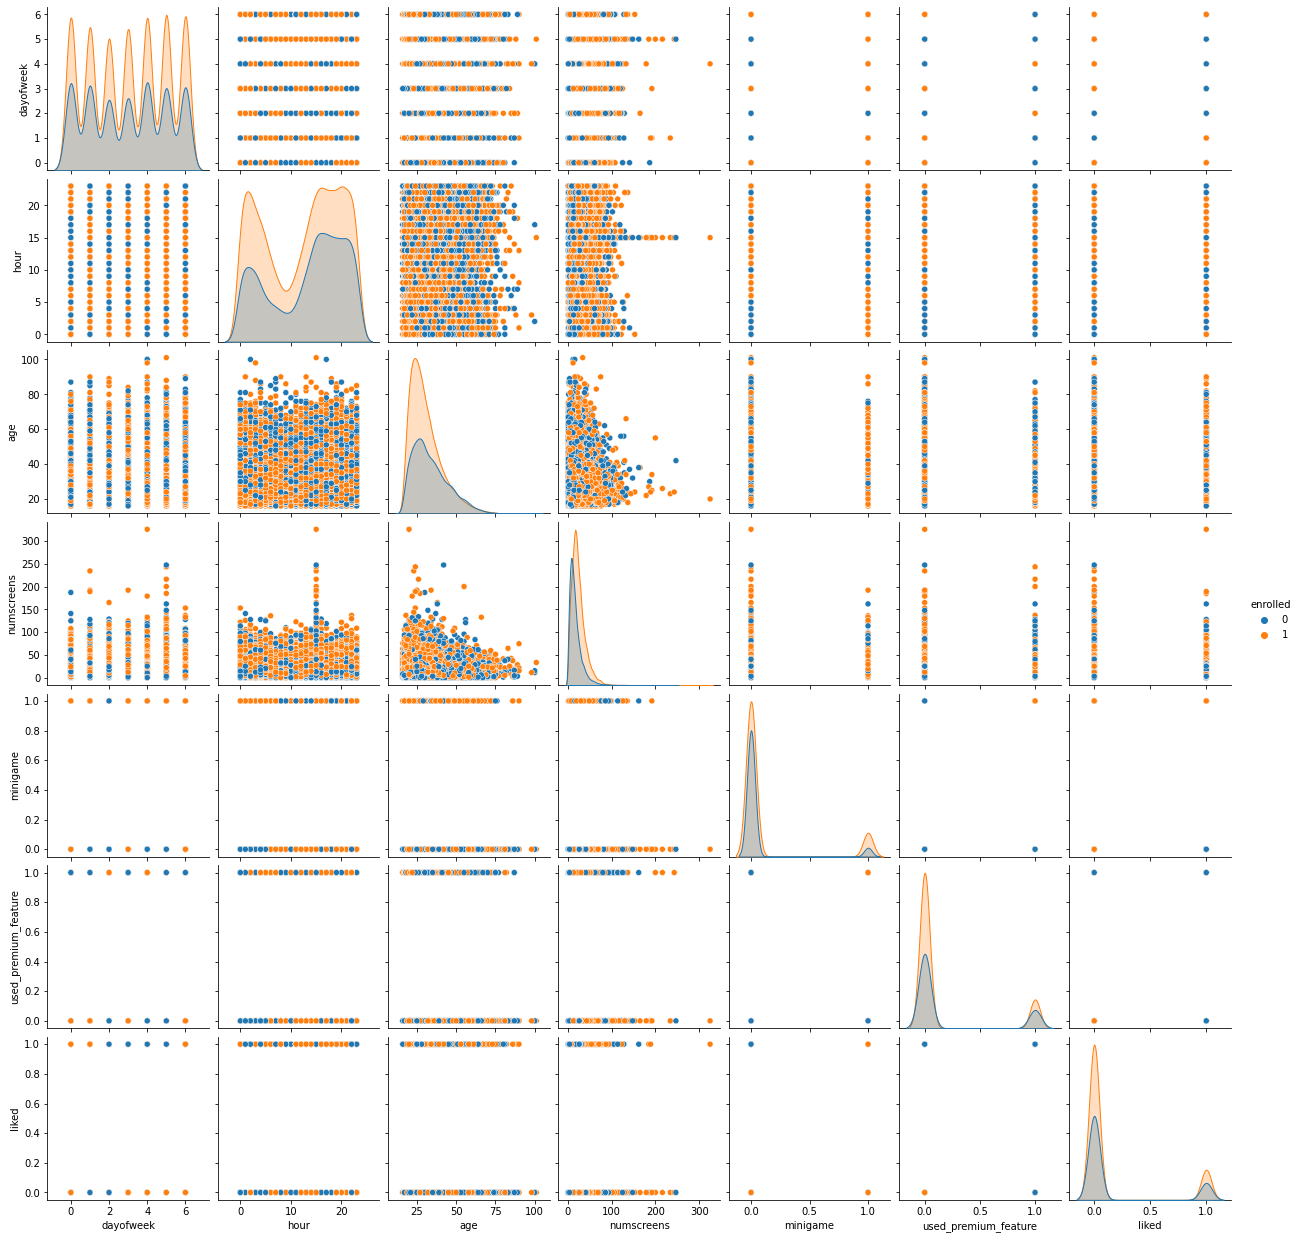

In [18]:
#The pair plot helps to visualize the distribution of data and scatter plot.

# Pailplot of fineTech_appData2 Dataset
 
#%matplotlib qt5 # for show graph in seperate window
sns.pairplot(df_drop, hue  = 'enrolled')

In pair plot we can see, the maximum features have two values like 0 and 1 and orange dots show the enrolled customer’s features. So we visualize the counterplot of enrolled data.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


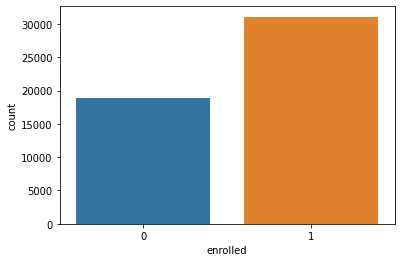

In [19]:
# Show counterplot of 'enrolled' feature
sns.countplot(df.enrolled)


In [20]:
# value enrolled and not enrolled customers
print("Not enrolled user = ", (df.enrolled < 1).sum(), "out of 50000")
print("Enrolled user = ",50000-(df.enrolled < 1).sum(),  "out of 50000")


Not enrolled user =  18926 out of 50000
Enrolled user =  31074 out of 50000


**Histogram of each feature of fineTech_appData2**


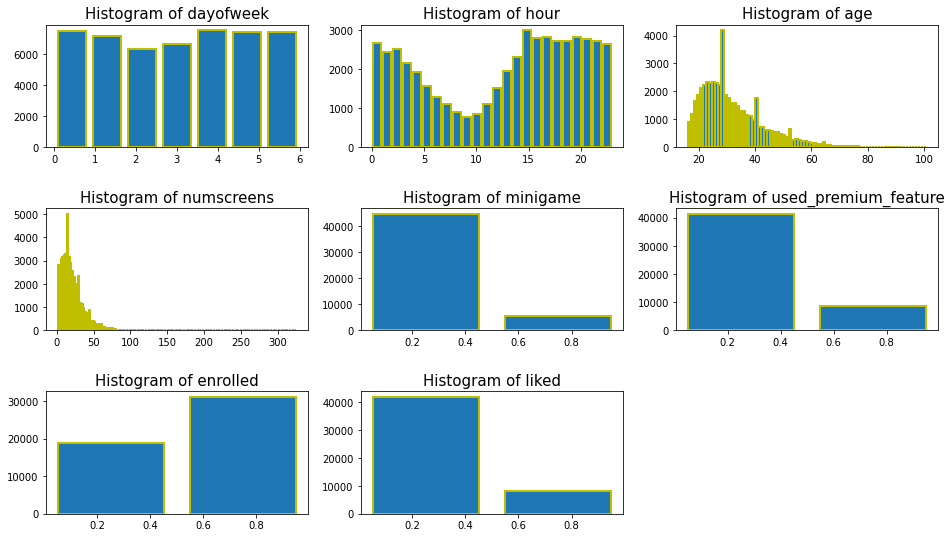

In [21]:
# plot histogram 
 
plt.figure(figsize = (16,9)) # figure size in ratio 16:9
features = df_drop.columns # list of columns name
for i,j in enumerate(features): 
    plt.subplot(3,3,i+1) # create subplot for histogram
    plt.title("Histogram of {}".format(j), fontsize = 15) # title of histogram
     
    bins = len(df_drop[j].unique()) # bins for histogram
    plt.hist(df_drop[j], bins = bins, rwidth = 0.8, edgecolor = "y", linewidth = 2, ) # plot histogram
     
plt.subplots_adjust(hspace=0.5) # space between horixontal axes (subplots)


In the above histogram, we can see minigame, used_primium_feature, enrolled, and like they have only two values and how they distributed.

The histogram of ‘dayofweek’ shows, on Tuesday and Wednesday slightly fewer customer registered the app.

The histogram of ‘hour’ shows the less customer register on the app around 10 AM.

The ‘age’ histogram shows, the maximum customers are younger.

The ‘numsreens’ histogram shows the few customers saw more than 40 screens.



**Correlation barplot with ‘enrolled’ feature**

Now we are trying to know which feature is strongly correlated with ‘enrolled’ feature with positive or negative through barplot.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


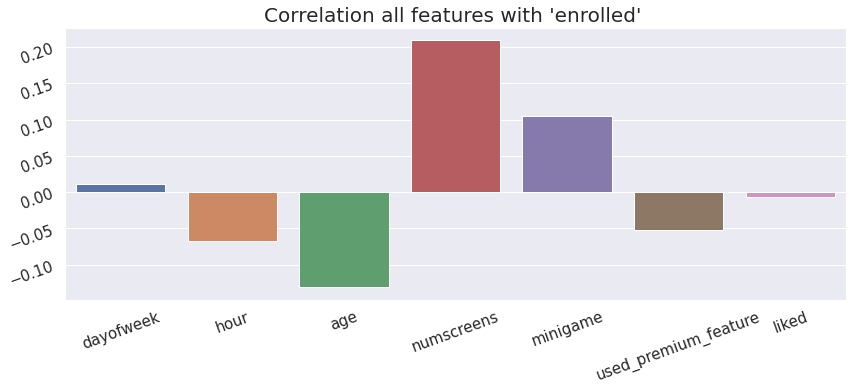

In [23]:
# show corelation barplot 
 
sns.set() # set background dark grid
plt.figure(figsize = (14,5))
plt.title("Correlation all features with 'enrolled' ", fontsize = 20)
df3 = df_drop.drop(['enrolled'], axis = 1) # drop 'enrolled' feature
ax =sns.barplot(df3.columns,df3.corrwith(df_drop.enrolled)) # plot barplot 
ax.tick_params(labelsize=15, labelrotation = 20, color ="k") # decorate x & y ticks font


We saw the heatmap correlation matrix but this was not showing correlation clearly but you can easily understand which feature is how much correlated with ‘enrolled’ feature using the above barplot.

The ‘numscreens’ and ‘minigame’ is strongly positively correlated with ‘enrolled’ feature than other feature.

The ‘hour’, ‘age’ and ‘used_premium_feature’ are strongly negatively correlated with the ‘enrolled’ feature.



Now, we are parsing ‘first_open’ and ‘enrolled_date’ object data in data and time format.



In [24]:
# parsinf object data into data time format
 
df['first_open'] =[parser.parse(i) for i in df['first_open']]
 
df['enrolled_date'] =[parser.parse(i) if isinstance(i, str) else i for i in df['enrolled_date']]
 
df.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int64
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

We are finding how much time the customer takes to get enrolled in the premium feature app after registration. For that subtract ‘fineTech_appData.first_open’ from ‘fineTech_appData.enrolled_date’ and set data type as timedelta64 in hours.

In [25]:
df['time_to_enrolled']  = (df.enrolled_date - df.first_open).astype('timedelta64[h]')

(array([2.8195e+04, 1.0320e+03, 5.6700e+02, 4.2500e+02, 2.8800e+02,
        1.7900e+02, 1.6500e+02, 9.7000e+01, 1.0400e+02, 2.2000e+01]),
 array([   0. ,  543.4, 1086.8, 1630.2, 2173.6, 2717. , 3260.4, 3803.8,
        4347.2, 4890.6, 5434. ]),
 <a list of 10 Patch objects>)

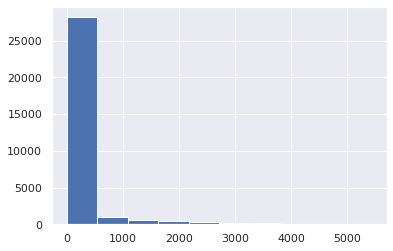

In [27]:
# Plot histogram
plt.hist(df['time_to_enrolled'].dropna())

(array([22793.,   755.,   707.,   288.,   347.,   210.,   187.,   212.,
          135.,   194.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

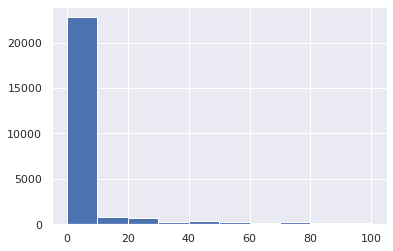

In [28]:
# Plot histogram
plt.hist(df['time_to_enrolled'].dropna(), range = (0,100)) 

In the above histogram, we know the maximum customers have enrolled the app in 10 hours from the registration.



**Feature selection**

Customers who enrolled after 48 hours, we are assigning them 0 value

In [29]:
# Those customers have enrolled after 48 hours set as 0
df.loc[df.time_to_enrolled > 48, 'enrolled'] = 0


Drop some ‘time_to_enrolled’, ‘enrolled_date’, ‘first_open’ feature they are not strongly correlated to the result.



In [30]:
df.drop(columns = ['time_to_enrolled', 'enrolled_date', 'first_open'], inplace=True)

In [33]:
df.head(5)


,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan",3,0,1,0,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1


Loading a new file which cotains index for top screens

In [34]:
from google.colab import files
uploaded = files.upload()

Saving top_screens.csv to top_screens.csv


In [46]:
fineTech_app_screen_Data=pd.read_csv("top_screens.csv").top_screens.values

In [49]:
fineTech_app_screen_Data

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [50]:
#Add ‘,’ at the end of each string of ‘screen_list’ for further operation.
df['screen_list'] = df.screen_list.astype(str) + ','


In [51]:
df.head(5)

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked,Unnamed: 0,top_screens
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan,,",3,0,1,0,1,0,0
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0,0,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1,0,0


In [52]:
#The ‘Screen_list’ contains string values but we can’t use it directly. So to solve this problem we are taking each screen name from 
#‘fineTech_app_screen_Data’ and append as a column by the same name to ‘fineTech_appData’. Then check this screen name is available 
#in ‘screen_list’ if it is available then add value 1 else 0 in the appended column.

# string into to number
 
for screen_name in fineTech_app_screen_Data:
    df[screen_name] = df.screen_list.str.contains(screen_name).astype(int)
    df['screen_list'] = df.screen_list.str.replace(screen_name+",", "")


In [53]:
df.head(2)

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked,Unnamed: 0,top_screens,Loan2,location,Institutions,Credit3Container,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Credit3Dashboard,Loan3,CC1Category,Splash,Loan,CC1,RewardsContainer,Credit3,Credit1,EditProfile,Credit2,Finances,CC3,Saving9,Saving1,Alerts,Saving8,Saving10,Leaderboard,Saving4,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,Saving7,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,Saving2,Saving6,Saving2Amount,Saving5,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker
0,235136,3,2,23,"joinscreen,product_review,ScanPreview,VerifyTo...",15,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,0,0,1,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [54]:
df.shape

(50000, 70)

In [60]:
df = df.drop(['Unnamed: 0', 'top_screens'], axis = 1)


In [62]:
df.shape

(50000, 68)

In [63]:
#Those screens are not availble in ‘fineTech_app_screen_Data’ that are counted and conted number store in 
#new column by name ‘remain_screen_list’.
# remain screen in 'screen_list'
df.loc[0,'screen_list']

'joinscreen,product_review,ScanPreview,VerifyToken,ProfileVerifySSN,Settings,ForgotPassword,,'

In [65]:
# count remain screen list and store counted number in 'remain_screen_list'
 
df['remain_screen_list'] = df.screen_list.str.count(",")

In [66]:
# Drop the 'screen_list'
df.drop(columns = ['screen_list'], inplace=True)


In [67]:
df.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'Loan2', 'location',
       'Institutions', 'Credit3Container', 'VerifyPhone', 'BankVerification',
       'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry', 'Cycle',
       'idscreen', 'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash',
       'Loan', 'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts', 'Saving8',
       'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile', 'VerifyHousing',
       'RewardDetail', 'VerifyHousingAmount', 'ProfileMaritalStatus',
       'ProfileChildren ', 'ProfileEducation', 'Saving7',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'Saving2', 'Saving6', 'Saving2Amount', 'Saving5',
       'ProfileJobTitle', 'Login', 'ProfileEmploymentLength', 'WebView',
       'SecurityModal', 'Loan4', 'ResendTok

In [68]:
#All the saving screens correlated with each other that’s we are taking the sum of all saving screens in each row and store
#in a single row for all customers.

# take sum of all saving screen in one place
saving_screens = ['Saving1',
                  'Saving2',
                  'Saving2Amount',
                  'Saving4',
                  'Saving5',
                  'Saving6',
                  'Saving7',
                  'Saving8',
                  'Saving9',
                  'Saving10',
                 ]
df['saving_screens_count'] = df[saving_screens].sum(axis = 1)
df.drop(columns = saving_screens, inplace = True)

In [69]:
#similarly for credit, CC1 and loan screens.
credit_screens = ['Credit1',
                  'Credit2',
                  'Credit3',
                  'Credit3Container',
                  'Credit3Dashboard',
                 ]
df['credit_screens_count'] = df[credit_screens].sum(axis = 1)
df.drop(columns = credit_screens, axis = 1, inplace = True)


In [70]:
cc_screens = ['CC1',
              'CC1Category',
              'CC3',
             ]
df['cc_screens_count'] = df[cc_screens].sum(axis = 1)
df.drop(columns = cc_screens, inplace = True)

In [71]:
loan_screens = ['Loan',
                'Loan2',
                'Loan3',
                'Loan4',
               ]
df['loan_screens_count'] = df[loan_screens].sum(axis = 1)
df.drop(columns = loan_screens, inplace = True)

In [72]:
df.shape

(50000, 50)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   user                     50000 non-null  int64
 1   dayofweek                50000 non-null  int64
 2   hour                     50000 non-null  int64
 3   age                      50000 non-null  int64
 4   numscreens               50000 non-null  int64
 5   minigame                 50000 non-null  int64
 6   used_premium_feature     50000 non-null  int64
 7   enrolled                 50000 non-null  int64
 8   liked                    50000 non-null  int64
 9   location                 50000 non-null  int64
 10  Institutions             50000 non-null  int64
 11  VerifyPhone              50000 non-null  int64
 12  BankVerification         50000 non-null  int64
 13  VerifyDateOfBirth        50000 non-null  int64
 14  ProfilePage              50000 non-null  int64
 15  Ve

In [74]:
df.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,Institutions,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Splash,RewardsContainer,EditProfile,Finances,Alerts,Leaderboard,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list,saving_screens_count,credit_screens_count,cc_screens_count,loan_screens_count
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0,50000.0000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.497000,0.165000,0.517760,0.293660,0.524600,0.319540,0.473480,0.158040,0.423160,0.364860,0.340700,0.200760,0.084000,0.048980,0.076540,0.073720,0.051520,0.053860,0.045080,0.030920,0.041420,0.047560,0.0,0.0455,0.041060,0.024420,0.026220,0.023580,0.031760,0.022460,0.029800,0.021160,0.096560,0.014220,0.013340,0.013400,0.008200,0.007580,7.214260,0.365020,0.92776,0.176860,0.788400
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.499996,0.371184,0.499689,0.455443,0.499399,0.466303,0.499301,0.364782,0.494065,0.481396,0.473949,0.400573,0.277391,0.215828,0.265863,0.261317,0.221058,0.225743,0.207482,0.173103,0.199262,0.212836,0.0,0.2084,0.198431,0.154351,0.159791,0.151738,0.175362,0.148176,0.170037,0.143919,0.295361,0.118398,0.114727,0.114981,0.090183,0.086733,3.672561,1.405511,1.21751,0.612787,0.677462
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.00000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.00000,0.000000,1.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,1.0

**Heatmap with the correlation matrix**

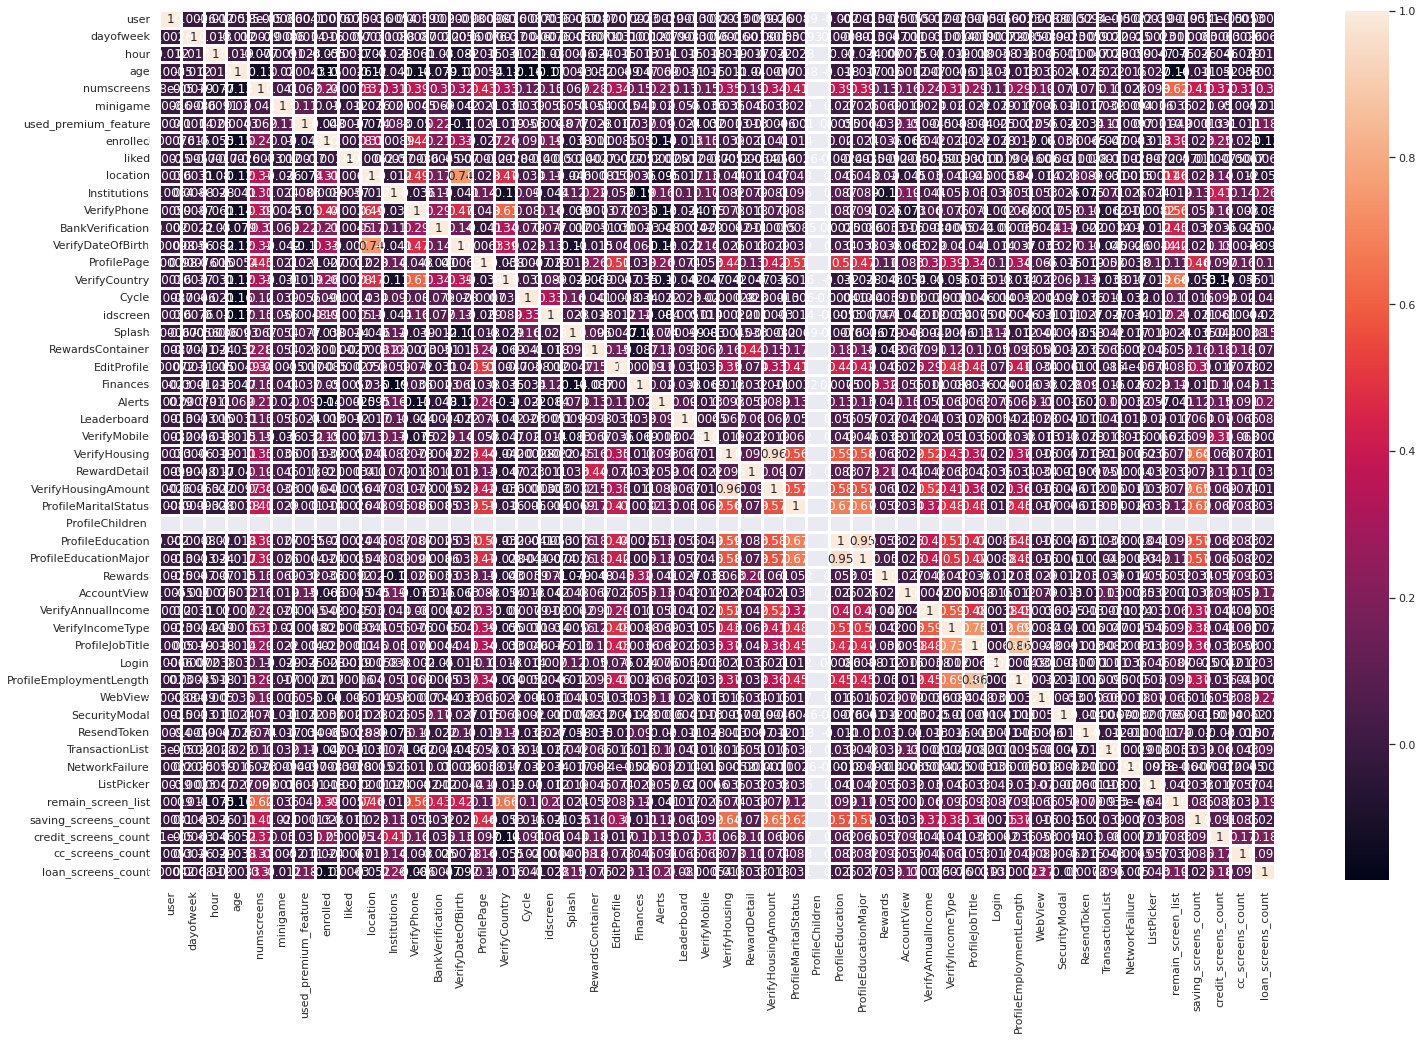

In [75]:
# Heatmap with correlation matrix of new fineTech_appData
 
plt.figure(figsize = (25,16)) 
sns.heatmap(df.corr(), annot = True, linewidth =2)


Profilechildren has no corelation as values in it are NaN

**Split dataset in Train and Test**

In [76]:
clean_fineTech_appData = df
target = df['enrolled']
df.drop(columns = 'enrolled', inplace = True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size = 0.2, random_state = 0)


In [77]:
print('Shape of X_train = ', X_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (40000, 49)
Shape of X_test =  (10000, 49)
Shape of y_train =  (40000,)
Shape of y_test =  (10000,)


In [78]:
# take User ID in another variable 
train_userID = X_train['user']
X_train.drop(columns= 'user', inplace =True)
test_userID = X_test['user']
X_test.drop(columns= 'user', inplace =True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [79]:
print('Shape of X_train = ', X_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of train_userID = ', train_userID.shape)
print('Shape of test_userID = ', test_userID.shape)

Shape of X_train =  (40000, 48)
Shape of X_test =  (10000, 48)
Shape of train_userID =  (40000,)
Shape of test_userID =  (10000,)


**Feature Scaling**

The multiple features in the different units so for the best accuracy need to convert all features in a single unit.



In [80]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)


**MODEL BUILDING**

In [81]:
# impoer required packages
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

**Decision Tree Classifier**

In [82]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion= 'entropy', random_state=0)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
accuracy_score(y_test, y_pred_dt)

0.6936

In [83]:
# train with Standert Scaling dataset
dt_model2 = DecisionTreeClassifier(criterion= 'entropy', random_state=0)
dt_model2.fit(X_train_sc, y_train)
y_pred_dt_sc = dt_model2.predict(X_test_sc)
accuracy_score(y_test, y_pred_dt_sc)

0.6932

**KNN Classifier**

In [84]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2,)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
 
accuracy_score(y_test, y_pred_knn)

0.6994

In [85]:
# train with Standert Scaling dataset
knn_model2 = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2,)
knn_model2.fit(X_train_sc, y_train)
y_pred_knn_sc = knn_model2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_knn_sc)

0.7314

**Naive Bayes Classifier**

In [87]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
 
accuracy_score(y_test, y_pred_nb)

0.7114

In [88]:
# train with Standert Scaling dataset
nb_model2 = GaussianNB()
nb_model2.fit(X_train_sc, y_train)
y_pred_nb_sc = nb_model2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_nb_sc)


0.7114

Random Forest Classifier

In [89]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
 
accuracy_score(y_test, y_pred_rf)

0.7621

In [91]:
# train with Standert Scaling dataset
rf_model2 = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rf_model2.fit(X_train_sc, y_train)
y_pred_rf_sc = rf_model2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_rf_sc)

0.7616

**Logistic Regression**

In [94]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state = 0, penalty = 'l2')
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
 
accuracy_score(y_test, y_pred_lr)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7682

In [95]:
# train with Standert Scaling dataset
lr_model2 = LogisticRegression(random_state = 0, penalty = 'l2')
lr_model2.fit(X_train_sc, y_train)
y_pred_lr_sc = lr_model2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_lr_sc)

0.768

**Support Vector Classifier**

In [96]:
# Support Vector Machine
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)
 
accuracy_score(y_test, y_pred_svc)

0.7609

In [97]:
# train with Standert Scaling dataset
svc_model2 = SVC()
svc_model2.fit(X_train_sc, y_train)
y_pred_svc_sc = svc_model2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_svc_sc)


0.7789

**XG Boost Classifier**

In [98]:
# XGBoost Classifier
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred_xgb)

0.7748

In [99]:
# train with Standert Scaling dataset
xgb_model2 = XGBClassifier()
xgb_model2.fit(X_train_sc, y_train)
y_pred_xgb_sc = xgb_model2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_xgb_sc)


0.7748

In [100]:
# XGB classifier with parameter tuning
xgb_model_pt1 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.005,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
 
xgb_model_pt1.fit(X_train, y_train)
y_pred_xgb_pt1 = xgb_model_pt1.predict(X_test)
 
accuracy_score(y_test, y_pred_xgb_pt1)


0.7887

In [101]:
# XGB classifier with parameter tuning
# train with Stander Scaling dataset
xgb_model_pt2 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.005,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
 
xgb_model_pt2.fit(X_train_sc, y_train)
y_pred_xgb_sc_pt2 = xgb_model_pt2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_xgb_sc_pt2)


0.7887

**We observ that Support Vector Classifier and XGBoost Classifier give best accuracy than ohter ML algorithm. But we will continue with XGBoost classifier because the accuracy is slightly higher than SVC.**

**Confusion Matrix**

Text(0.5, 1.0, 'Confussion Matrix')

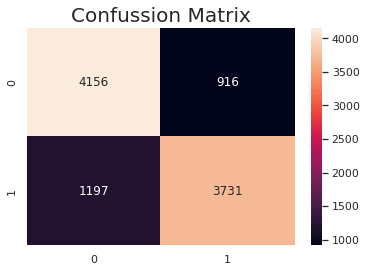

In [102]:
# confussion matrix
cm_xgb_pt2 = confusion_matrix(y_test, y_pred_xgb_sc_pt2)
sns.heatmap(cm_xgb_pt2, annot = True, fmt = 'g')
plt.title("Confussion Matrix", fontsize = 20) 


The model is giving type II error higher than type I.



**Classification report of ML model**

In [103]:
# Clasification Report
cr_xgb_pt2 = classification_report(y_test, y_pred_xgb_sc_pt2)
 
print("Classification report >>> \n", cr_xgb_pt2)


Classification report >>> 
               precision    recall  f1-score   support

           0       0.78      0.82      0.80      5072
           1       0.80      0.76      0.78      4928

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



**Mapping predicted output to the target**

In [105]:
final_result = pd.concat([test_userID, y_test], axis = 1)
final_result['predicted result'] = y_pred_xgb_sc_pt2
 
print(final_result)

         user  enrolled  predicted result
11841  239786         1                 1
19602  279644         1                 1
45519   98290         0                 0
25747  170150         1                 1
42642  237568         1                 0
...       ...       ...               ...
25091  143036         1                 1
27853   91158         1                 1
47278  248318         0                 0
37020  142418         1                 1
2217   279355         1                 0

[10000 rows x 3 columns]
